In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
crc_estr = pd.read_csv("./output/crc_estr.csv")
stad_estr = pd.read_csv("./output/stad_estr.csv")
ucec_estr = pd.read_csv("./output/ucec_estr.csv")

In [3]:
crc_estr["type"] = "notsig"
crc_estr.loc[(crc_estr["msi_pvalue"] < 0.05) & ((crc_estr["coef"]*crc_estr["msi_coef"] > 0) == True), "type"] = "sig"

In [4]:
stad_estr["type"] = "notsig"
stad_estr.loc[(stad_estr["msi_pvalue"] < 0.05) & ((stad_estr["coef"]*stad_estr["msi_coef"] > 0) == True), "type"] = "sig"

In [5]:
ucec_estr["type"] = "notsig"
ucec_estr.loc[(ucec_estr["msi_pvalue"] < 0.05) & ((ucec_estr["coef"]*ucec_estr["msi_coef"] > 0) == True), "type"] = "sig"

In [93]:
346/(1065+346)

0.24521615875265768

In [6]:
crc_estr["type"].value_counts()

notsig    1065
sig        346
Name: type, dtype: int64

In [95]:
116/(116+266)

0.3036649214659686

In [7]:
stad_estr["type"].value_counts()

notsig    266
sig       116
Name: type, dtype: int64

In [96]:
69/(69+39)

0.6388888888888888

In [8]:
ucec_estr["type"].value_counts()

sig       69
notsig    39
Name: type, dtype: int64

Text(0.5, 1.0, 'UCEC')

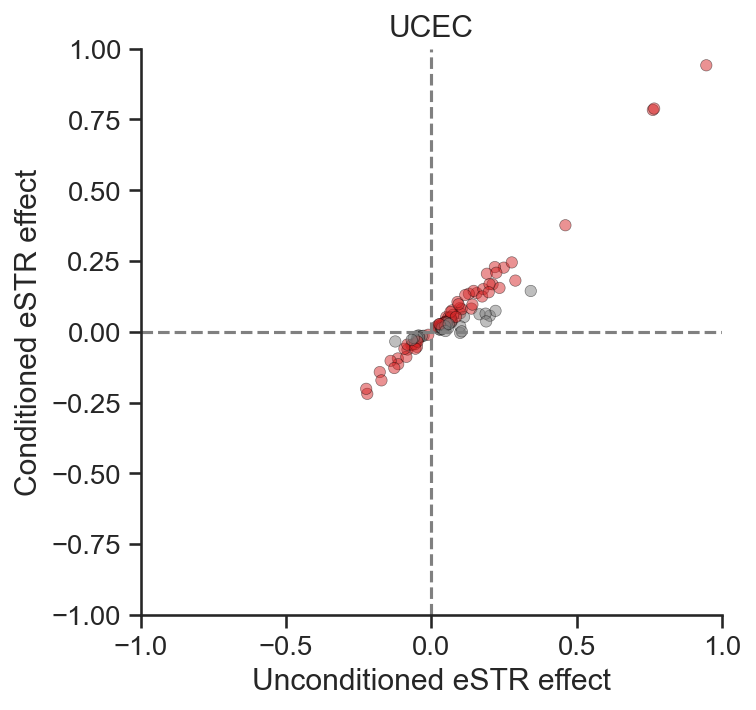

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.2)

sns.scatterplot(ax = axes, data = ucec_estr, 
                x = "coef", y = "msi_coef", 
                palette= dict(sig = sns.color_palette("tab10")[3], notsig = sns.color_palette("tab10")[7]),
                s = 30,
                alpha = 0.5,
                edgecolor = "black",
                linewidth = 0.3,
                hue = "type")
axes.set_xlim(-1, 1)
axes.set_ylim(-1,1)
axes.set_xlabel("Unconditioned eSTR effect")
axes.set_ylabel("Conditioned eSTR effect")
axes.axhline(0, color = "gray", linestyle = "--")
axes.axvline(0, color = "gray", linestyle = "--")
axes.get_legend().remove()
axes.set_title("UCEC")

In [110]:
crc_stad = np.intersect1d(crc_estr.loc[crc_estr["type"] == "sig", "gene"], stad_estr.loc[stad_estr["type"] == "sig", "gene"])

In [113]:
np.intersect1d(crc_stad, ucec_estr.loc[ucec_estr["type"] == "sig", "gene"])

array(['ABCF1', 'MRE11', 'SEC31A', 'TNKS2', 'TTC37'], dtype=object)

### compare with eQTL SNP associated genes

In [19]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib import pyplot as plt 

In [14]:
crc_snp = pd.concat([pd.read_csv("../cis_eQTL/COAD_tumor.cis_eQTL.txt", sep = "\t"),
                     pd.read_csv("../cis_eQTL/READ_tumor.cis_eQTL.txt", sep = "\t")]).reset_index()
crc_snp["gene_name"]  = [i.split("|")[0] for i in crc_snp["gene"]]

stad_snp = pd.read_csv("../cis_eQTL/STAD_tumor.cis_eQTL.txt", sep = "\t")
stad_snp["gene_name"]  = [i.split("|")[0] for i in stad_snp["gene"]]

ucec_snp = pd.read_csv("../cis_eQTL/UCEC_tumor.cis_eQTL.txt", sep = "\t")
ucec_snp["gene_name"]  = [i.split("|")[0] for i in ucec_snp["gene"]]

In [15]:
crc_snp["gene_name"].nunique(), stad_snp["gene_name"].nunique(), ucec_snp["gene_name"].nunique()

(5302, 4913, 1188)

In [16]:
ind_crc = np.setdiff1d(crc_estr["gene"], crc_snp["gene_name"].unique())
ind_stad = np.setdiff1d(stad_estr["gene"], stad_snp["gene_name"].unique())
ind_ucec = np.setdiff1d(ucec_estr["gene"], ucec_snp["gene_name"].unique())

In [91]:
258/(258+93)

0.7350427350427351

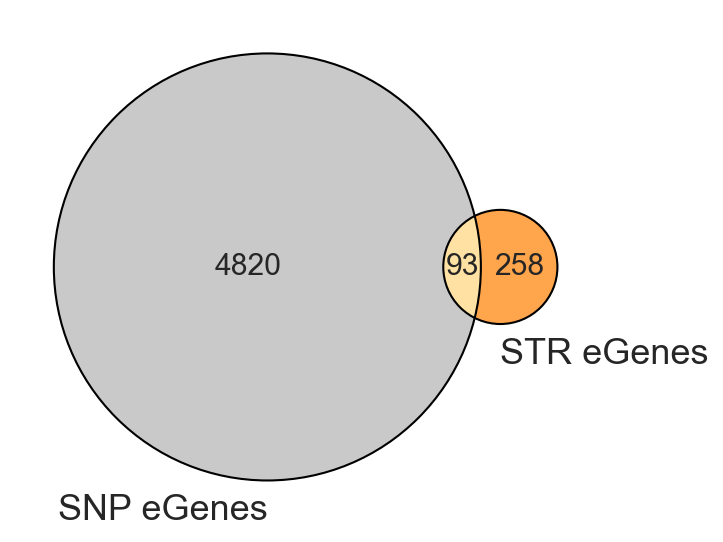

In [88]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi = 150)
sns.set_theme(style="white", font_scale = 1.2)
set1 = set(stad_estr["gene"].unique())
set2 = set(stad_snp["gene_name"].unique())

venn2([set2, set1], ("SNP eGenes",# (" + str(len(set1)) + ")", 
                    "STR eGenes"), #(" + str(len(set2)) + ")"),
     set_colors = (sns.color_palette("Set2")[-1], sns.color_palette("Paired")[7]),
     alpha = 0.7)

venn2_circles([set2, set1], linewidth=1) 
#cir[0].set_color(sns.color_palette("Paired")[0])
#cir[0].set_edgecolor(sns.color_palette("Paired")[1])
#cir[1].set_color("white")
#cir[1].set_edgecolor("black")
plt.show()

In [41]:
ind_crc = np.setdiff1d(crc_estr.query(" type == 'sig' ")["gene"], crc_snp["gene_name"].unique())

In [42]:
ind_stad = np.setdiff1d(stad_estr.query(" type == 'sig' ")["gene"], stad_snp["gene_name"].unique())

In [43]:
ind_ucec = np.setdiff1d(ucec_estr.query(" type == 'sig' ")["gene"], ucec_snp["gene_name"].unique())

In [46]:
np.intersect1d(np.intersect1d(ind_crc, ind_stad), ind_ucec)

array(['ABCF1', 'MRE11', 'SEC31A', 'TNKS2'], dtype=object)